# Combine bias images to make master


The final step is to combine the individual calibrated bias images into a single combined image. That combined image will have less noise than the individual images, minimizing the noise added to the remaining images when the bias is subtracted.

Regardless of which path you took through the calibration of the biases (with overscan or without) there should be a folder named `reduced` that contains the calibrated bias images. If there is not, please run the previous notebook before continuing with this one.

In [1]:
from pathlib import Path
import os

from astropy.nddata import CCDData
from astropy.stats import mad_std

import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np

from convenience_functions import show_image

download_base_url = 'http://physics.mnstate.edu/craig/ccd-guide/'

The remained of this notebook assumes the calibrated bias images are in the folder in the cell below.

In [2]:
calibrated_images = Path('reduced')

In [3]:
reduced_images = ccdp.ImageFileCollection(calibrated_images)

## Recommended settings for image combination

As discussed in the [notebook about combining images](), the recommendation is that you combine by averaging the individual images but sigma clip to remove extreme values. 

[ccdproc]() provides two ways to combine:

+ An object-oriented interface built around the `Combiner` object, described in the [ccdproc documentation on image combination]().
+ A function called `combine`, which we will use here because the function allows one to specify the maximum amount of memory that should be used during combination. That feature can be essential depending on how many images you need to combine, how big they are, and how much memory your computer has. 

*NOTE: If using a version of ccdproc lower than 2.0 set the memory limit a factor of 2-3 lower than you want the maximum memory consumption to be.*

In [4]:
calibrated_biases = reduced_images.files_filtered(imagetyp='bias', include_path=True)

combined_bias = ccdp.combine(calibrated_biases, output_file=calibrated_images / 'combined_bias.fit',
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )

INFO:astropy:splitting each image into 2 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 2 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


## Result

A single calibrated image and the combined image are shown below. There is significant two-dimensional structure in the bias that cannot easily be removed by subtracting only the overscan in the next image reduction steps. It takes little time to acquire bias images and doing so will result in higher quality science images.

Text(0.5,1,'6 bias images combined')

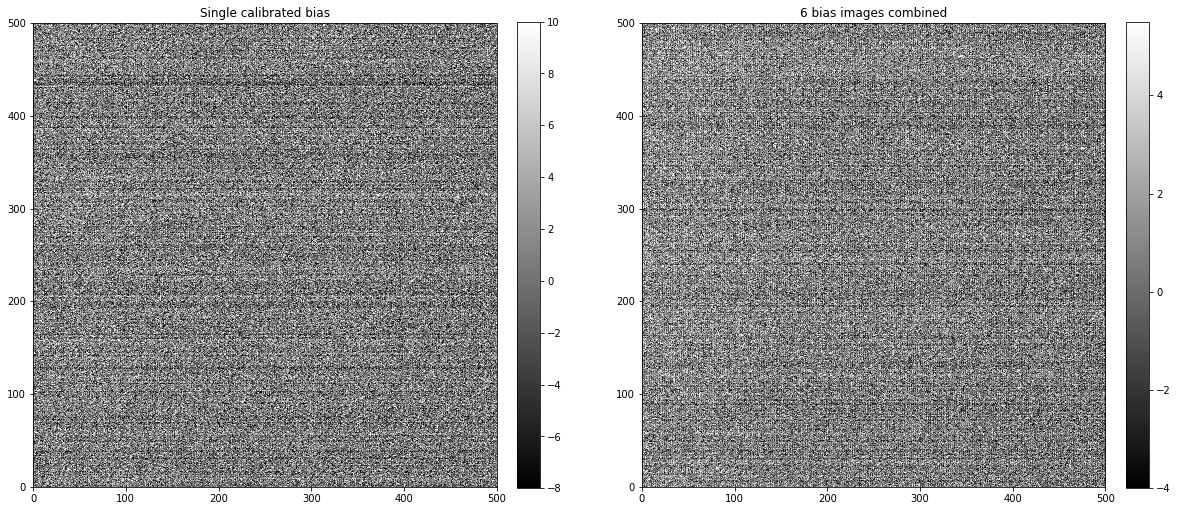

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

show_image(CCDData.read(calibrated_biases[0]).data[500:1000, 500:1000], cmap='gray', ax=ax1, fig=fig)
ax1.set_title('Single calibrated bias')
show_image(combined_bias.data[500:1000, 500:1000], cmap='gray', ax=ax2, fig=fig)
ax2.set_title('{} bias images combined'.format(len(calibrated_biases)))